In [2]:
# 데이터 전처리 및 분석에 필요한 패키지 로드
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns

df_train = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(전처리).csv')
df_ch = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(입원환자만 중복제거).csv')

In [6]:
df_train[df_train['서식코드'] == '의과입원'].shape, df_ch.shape

((283962, 16), (271096, 16))

In [9]:
df_ch.head(2)

,가입자 일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,1,여성,55~59,전라남도,20190807,의과입원,내과,"내분비, 영양 및 대사질환",비뇨생식계통 질환,7,21,0.25,861590,205810,655780,0
1,1,여성,55~59,전라남도,20191022,의과입원,정형외과,근골격계통 질환,근골격계통 질환,12,15,0.25,2899570,638600,2260970,0


In [10]:
df_ch['주상병코드'].value_counts()

근골격계통 질환                      31459
손상, 중독 및 외인에 의한 질환            29542
호흡계통의 질환                      27130
정신 및 행동장애                     27130
신생물                           25077
순환계통의 질환                      23408
신경계통의 질환                      18271
소화계통의 질환                      13767
특정 감염성 및 기생충성 질환              13197
미분류 질환                        12090
비뇨생식계통 질환                     11468
눈, 귀의 질환                       8672
건강상태 및 보건서비스 접촉에 영향을 주는 요인     7823
산부인과계통 질환                      7092
혈액 및 조혈기관의 질환                  6055
내분비, 영양 및 대사질환                 4569
피부과 질환                         2107
출생전후기관련 질환                     1272
선천기형, 변형 및 염색체이상                935
특수목적 코드                          32
Name: 주상병코드, dtype: int64

In [85]:
df_date = pd.DataFrame(df_ch['요양일수'].value_counts())
df_date.reset_index(inplace = True)
df_date.columns = ['요양일수', '빈도수']
df_date.sort_values(by = '요양일수', inplace = True)
df_date.reset_index(inplace = True)
df_date.drop(['index'], axis = 1, inplace = True)
df_date['요양일수'] = df_date['요양일수'].apply(lambda x: f'{x}' if x < 32 else '32+') 

입원환자들의 평균 요양일수 10.43일


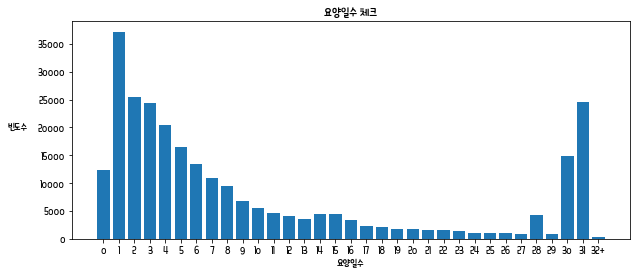

In [87]:
print(f'입원환자들의 평균 요양일수 {round(df_ch["요양일수"].mean(), 2)}일')
plt.figure(figsize = (10, 4))
plt.title('요양일수 체크')
plt.bar(df_date['요양일수'], df_date['빈도수'])
# plt.xticks(x, xlabel)
plt.xlabel('요양일수')
plt.ylabel('빈도수', rotation = 0, labelpad = 20)
plt.show()

In [ ]:
df_date1 = pd.DataFrame(df_ch['입내원일수'].value_counts())
df_date1.reset_index(inplace = True)
df_date1.columns = ['입내원일수', '빈도수']
df_date1.sort_values(by = '입내원일수', inplace = True)
df_date1.reset_index(inplace = True)
df_date1.drop(['index'], axis = 1, inplace = True)
df_date1['입내원일수'] = df_date1['입내원일수'].apply(lambda x: f'{x}' if x < 32 else '32+') 

입원환자들의 평균 입원일수 15.74일


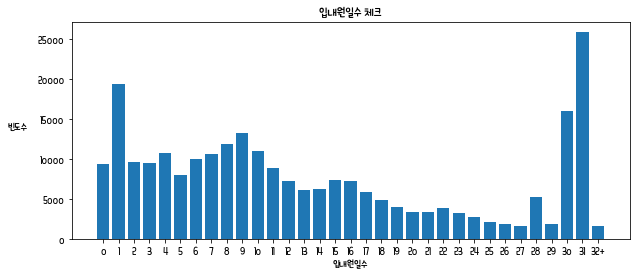

In [50]:
print(f'입원환자들의 평균 입원일수 {round(df_ch["입내원일수"].mean(), 2)}일')
plt.figure(figsize = (10, 4))
plt.title('입내원일수 체크')
plt.bar(df_date1['입내원일수'], df_date1['빈도수'])
# plt.xticks(x, xlabel)
plt.xlabel('입내원일수')
plt.ylabel('빈도수', rotation = 0, labelpad = 20)
plt.show()

In [84]:
df_date2 = pd.DataFrame(df_train['요양일수'].value_counts())
df_date2.reset_index(inplace = True)
df_date2.columns = ['요양일수', '빈도수']
df_date2.sort_values(by = '요양일수', inplace = True)
df_date2.reset_index(inplace = True)
df_date2.drop(['index'], axis = 1, inplace = True)
df_date2['요양일수'] = df_date2['요양일수'].apply(lambda x: f'{x}' if x < 32 else '32+') 

전체환자들의 평균 요양일수 1.2일


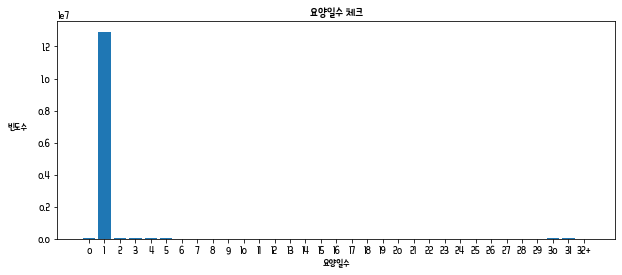

In [88]:
print(f'전체환자들의 평균 요양일수 {round(df_train["요양일수"].mean(), 2)}일')
plt.figure(figsize = (10, 4))
plt.title('요양일수 체크')
plt.bar(df_date2['요양일수'], df_date2['빈도수'])
# plt.xticks(x, xlabel)
plt.xlabel('요양일수')
plt.ylabel('빈도수', rotation = 0, labelpad = 20)
plt.show()

In [89]:
df_date3 = pd.DataFrame(df_train['입내원일수'].value_counts())
df_date3.reset_index(inplace = True)
df_date3.columns = ['입내원일수', '빈도수']
df_date3.sort_values(by = '입내원일수', inplace = True)
df_date3.reset_index(inplace = True)
df_date3.drop(['index'], axis = 1, inplace = True)
df_date3['입내원일수'] = df_date3['입내원일수'].apply(lambda x: f'{x}' if x < 32 else '32+') 

전체환자들의 평균 입원일수 1.88일


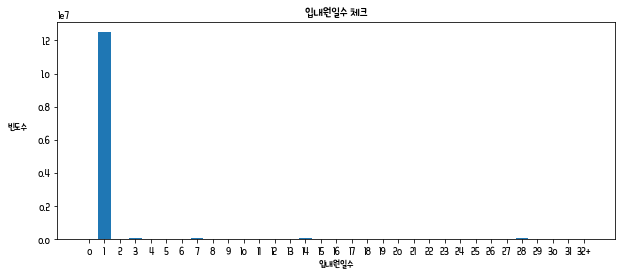

In [90]:
print(f'전체환자들의 평균 입원일수 {round(df_train["입내원일수"].mean(), 2)}일')
plt.figure(figsize = (10, 4))
plt.title('입내원일수 체크')
plt.bar(df_date3['입내원일수'], df_date3['빈도수'])
# plt.xticks(x, xlabel)
plt.xlabel('입내원일수')
plt.ylabel('빈도수', rotation = 0, labelpad = 20)
plt.show()

In [68]:
print(round(df_ch['심결요양급여비용총액'].mean()), round(df_train[df_train['서식코드'] == '의과입원']['심결요양급여비용총액'].mean()), sep = ' / ')
print(round(df_ch['요양일수'].mean(), 2), round(df_train[df_train['서식코드'] == '의과입원']['요양일수'].mean(), 2), sep = ' / ')
print(round(df_ch['입내원일수'].mean(), 2), round(df_train[df_train['서식코드'] == '의과입원']['입내원일수'].mean(), 2), sep = ' / ')

2161919 / 2156115
10.43 / 10.35
15.74 / 15.6


In [96]:
print(f'전체환자들의 평균 심결요양급여비용총액 {round(df_train["심결요양급여비용총액"].mean(), 2)}원')
print(f'입원환자들의 평균 심결요양급여비용총액 {round(df_ch["심결요양급여비용총액"].mean(), 2)}원')
print(f'비입원환자들의 평균 심결요양급여비용총액 {round(df_train[df_train["서식코드"] != "의과입원"]["심결요양급여비용총액"].mean(), 2)}원')

df_ch['심결요양급여비용총액'].describe()

전체환자들의 평균 심결요양급여비용총액 84163.88원
입원환자들의 평균 심결요양급여비용총액 2161918.68원
비입원환자들의 평균 심결요양급여비용총액 38535.06원


count    2.710960e+05
mean     2.161919e+06
std      3.729614e+06
min      2.000000e+01
25%      5.163100e+05
50%      1.317820e+06
75%      2.447182e+06
max      1.996893e+08
Name: 심결요양급여비용총액, dtype: float64

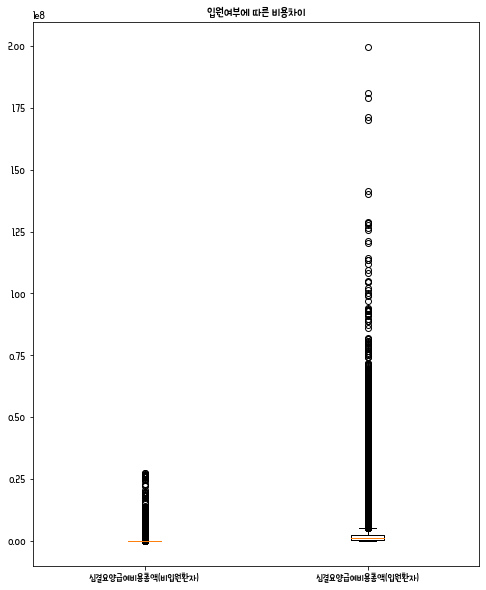

In [92]:
plt.figure(figsize = (8, 10))
plt.boxplot([df_train[df_train['서식코드'] != '의과입원']['심결요양급여비용총액'], df_ch['심결요양급여비용총액']],
            labels = ['심결요양급여비용총액(비입원환자)', '심결요양급여비용총액(입원환자)'])
plt.title('입원여부에 따른 비용차이')
plt.show()

In [81]:
df_train['심결요양급여비용총액'].describe()

count    1.317834e+07
mean     8.416388e+04
std      6.471434e+05
min      1.000000e+01
25%      1.330000e+04
50%      1.735000e+04
75%      3.120000e+04
max      1.996893e+08
Name: 심결요양급여비용총액, dtype: float64